In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#ONE-HOT ENCODER
used to convert categorical columns into floats which leads to better
model predictions


---
if there is a column with two classes then it assigns binary representation to classes ex [1,0] for class1 and [0,1] for class2


In [2]:
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns


In [3]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
categorical_cols=['sex' , 'class' , 'alive' , 'embarked'] # all the categorical colums in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.dropna(subset=categorical_cols)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [6]:
encoder=OneHotEncoder(sparse_output=False )
encoded_data=encoder.fit_transform(df[categorical_cols])

In [7]:
encoded_data
# the data has been encoded to  0 and 1s

array([[0., 1., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [8]:
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

In [9]:
df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

print("\nDataFrame after One-Hot Encoding:")
print(df_encoded.head())


DataFrame after One-Hot Encoding:
   survived  pclass   age  sibsp  parch     fare    who  adult_male deck  \
0         0       3  22.0      1      0   7.2500    man        True  NaN   
1         1       1  38.0      1      0  71.2833  woman       False    C   
2         1       3  26.0      0      0   7.9250  woman       False  NaN   
3         1       1  35.0      1      0  53.1000  woman       False    C   
4         0       3  35.0      0      0   8.0500    man        True  NaN   

   embark_town  ...  sex_male  class_First  class_Second  class_Third  \
0  Southampton  ...       1.0          0.0           0.0          1.0   
1    Cherbourg  ...       0.0          1.0           0.0          0.0   
2  Southampton  ...       0.0          0.0           0.0          1.0   
3  Southampton  ...       0.0          1.0           0.0          0.0   
4  Southampton  ...       1.0          0.0           0.0          1.0   

   alive_no  alive_yes  embarked_C  embarked_Q  embarked_S  embarked_

### One-Hot Encoding in the Titanic Dataset
The original embarked column in the Titanic dataset contained three unique categories:

'C' (Cherbourg) ,
'Q' (Queenstown) ,
'S' (Southampton)
When we apply one-hot encoding, this categorical column is transformed into multiple binary columns, each representing a unique category.


Thus, the new columns are:

embarked_C(1 if the passenger embarked from Cherbourg, 0 otherwise).
embarked_Q (1 if the passenger embarked from Queenstown, 0 otherwise).
embarked_S (1 if the passenger embarked from Southampton, 0 otherwise).
If both embarked_Q and embarked_S are 0, it means the passenger embarked from Cherbourg (C), since this category was dropped during encoding.



In [10]:
df_encoded.info()
# as we can see after the encoding the data columns have been changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      891 non-null    int64   
 1   pclass        891 non-null    int64   
 2   age           714 non-null    float64 
 3   sibsp         891 non-null    int64   
 4   parch         891 non-null    int64   
 5   fare          891 non-null    float64 
 6   who           891 non-null    object  
 7   adult_male    891 non-null    bool    
 8   deck          203 non-null    category
 9   embark_town   889 non-null    object  
 10  alone         891 non-null    bool    
 11  sex_female    891 non-null    float64 
 12  sex_male      891 non-null    float64 
 13  class_First   891 non-null    float64 
 14  class_Second  891 non-null    float64 
 15  class_Third   891 non-null    float64 
 16  alive_no      891 non-null    float64 
 17  alive_yes     891 non-null    float64 
 18  embarked_C

#Feature Scaling
##Techniques

*  Min-Max
*  Z-Score
*  Decimal Scaling






#Min-Max Scaling
### -used to scale data in any range[a,b]
## Why is it used?


*  to represent large data in a small range
* it still maintains the the original patterns in data

FORMULA

---


Scaled data=((data_old-old_min)/(max_old-old_min))*[a-b] + a




In [11]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler

In [12]:
house_data=pd.DataFrame(fetch_california_housing().data , columns=fetch_california_housing().feature_names)
house_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [13]:
columns = ["MedInc", "HouseAge", "AveRooms"]
data = house_data[columns].copy()
data.head()

,MedInc,HouseAge,AveRooms
0,8.3252,41.0,6.984127
1,8.3014,21.0,6.238137
2,7.2574,52.0,8.288136
3,5.6431,52.0,5.817352
4,3.8462,52.0,6.281853


In [14]:
minmax_scaler = MinMaxScaler(feature_range=(2, 5))#feature range is the [a , b] range
data["MedInc_minmax"] = minmax_scaler.fit_transform(data[["MedInc"]])
data.head()

,MedInc,HouseAge,AveRooms,MedInc_minmax
0,8.3252,41.0,6.984127,3.619005
1,8.3014,21.0,6.238137,3.614081
2,7.2574,52.0,8.288136,3.398084
3,5.6431,52.0,5.817352,3.064096
4,3.8462,52.0,6.281853,2.692328


#Z-Score Normalization
###What is Z-Score Normalization?
Z-Score Normalization (also called standardization) is a technique used to scale numerical data by transforming it into a distribution with a mean of 0 and a standard deviation of 1. This makes the data unitless and comparable across different scales.

### Formula
  Scaled data=(datapt_old-mean_old)/standard deviation(old)

In [15]:
from sklearn.preprocessing import StandardScaler
zscore_scaler = StandardScaler()
data["MedInc_zscore"] = zscore_scaler.fit_transform(data[["MedInc"]])
data.head()

,MedInc,HouseAge,AveRooms,MedInc_minmax,MedInc_zscore
0,8.3252,41.0,6.984127,3.619005,2.344766
1,8.3014,21.0,6.238137,3.614081,2.332238
2,7.2574,52.0,8.288136,3.398084,1.782699
3,5.6431,52.0,5.817352,3.064096,0.932968
4,3.8462,52.0,6.281853,2.692328,-0.012881


# Decimal Scaling
###What is Decimal Scaling?
Decimal Scaling is a normalization technique that transforms data by dividing each value by a power of 10, making sure that all values lie within a specific range. This technique is useful when dealing with large numerical values.

In [16]:
max_abs = data["MedInc"].abs().max()
scaling_factor = 10 ** len(str(int(max_abs)))
data["MedInc_decimal"] = data["MedInc"] / scaling_factor
data.head()

,MedInc,HouseAge,AveRooms,MedInc_minmax,MedInc_zscore,MedInc_decimal
0,8.3252,41.0,6.984127,3.619005,2.344766,0.083252
1,8.3014,21.0,6.238137,3.614081,2.332238,0.083014
2,7.2574,52.0,8.288136,3.398084,1.782699,0.072574
3,5.6431,52.0,5.817352,3.064096,0.932968,0.056431
4,3.8462,52.0,6.281853,2.692328,-0.012881,0.038462


Text(0.5, 1.0, 'Z-score Standardized')

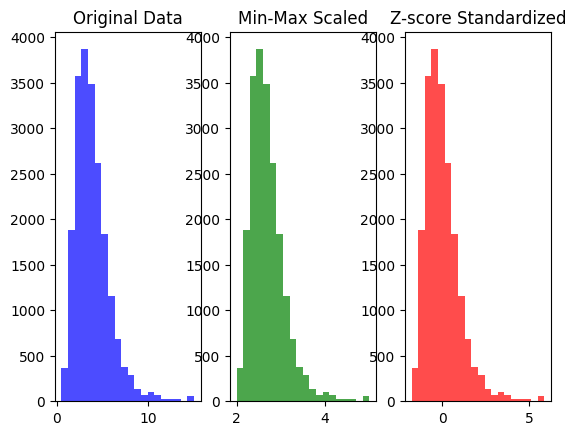

In [17]:
# Original Distribution
plt.subplot(1, 3, 1)
plt.hist(data["MedInc"], bins=20, color='blue', alpha=0.7)
plt.title("Original Data")

# Min-Max Scaled
plt.subplot(1, 3, 2)
plt.hist(data["MedInc_minmax"], bins=20, color='green', alpha=0.7)
plt.title("Min-Max Scaled")

# Z-score Scaled
plt.subplot(1, 3, 3)
plt.hist(data["MedInc_zscore"], bins=20, color='red', alpha=0.7)
plt.title("Z-score Standardized")

# Binning (Discretization) in Data Processing
Binning (also called discretization) is a technique used in data preprocessing where continuous numerical values are grouped into discrete categories or bins. This helps in:

*  
Transforming continuous features into categorical features for models that work better with categories.
*  Improving interpretability by creating meaningful groupings.

*   
Reducing noise and variance in the data.








Types of Binning

---


**1. Equal-Width Binning**
*   divides the data range into equiwidth intervals
*   Bin_Width= (MAXdata_pt-MINdata_pt)/Number of bins

**2. Equal-Frequency Binning **
*   Divides data into bins containing an equal number of observations.
*   Instead of fixed-width, bin boundaries are set based on quantiles (e.g., quartiles, percentiles).








In [18]:
#equiwidth
## function to cal binwidth
def equal_width_binning(data, column, num_bins):
    min_val = data[column].min()
    max_val = data[column].max()
    return  (max_val - min_val) / num_bins
bin_width=equal_width_binning(data , 'HouseAge' , 6)
bin_width


8.5

In [19]:
bin_label=[ 'Very Recent','Recent' , 'Medium' , 'Old' , 'Very Old' , 'Asthetic' ]
data['HouseAge_binned'] = pd.cut(data['HouseAge'], bins=6, labels=bin_label)
data.head()

,MedInc,HouseAge,AveRooms,MedInc_minmax,MedInc_zscore,MedInc_decimal,HouseAge_binned
0,8.3252,41.0,6.984127,3.619005,2.344766,0.083252,Very Old
1,8.3014,21.0,6.238137,3.614081,2.332238,0.083014,Medium
2,7.2574,52.0,8.288136,3.398084,1.782699,0.072574,Asthetic
3,5.6431,52.0,5.817352,3.064096,0.932968,0.056431,Asthetic
4,3.8462,52.0,6.281853,2.692328,-0.012881,0.038462,Asthetic


In [20]:
#equidepth bining
data['HouseAge_equidepth'] = pd.qcut(data['HouseAge'], q=6, labels=bin_label)
data.head()

,MedInc,HouseAge,AveRooms,MedInc_minmax,MedInc_zscore,MedInc_decimal,HouseAge_binned,HouseAge_equidepth
0,8.3252,41.0,6.984127,3.619005,2.344766,0.083252,Very Old,Very Old
1,8.3014,21.0,6.238137,3.614081,2.332238,0.083014,Medium,Recent
2,7.2574,52.0,8.288136,3.398084,1.782699,0.072574,Asthetic,Asthetic
3,5.6431,52.0,5.817352,3.064096,0.932968,0.056431,Asthetic,Asthetic
4,3.8462,52.0,6.281853,2.692328,-0.012881,0.038462,Asthetic,Asthetic


### note that the result for row 1 is different because the first one divides using equal width of bins or bin size while the second one divides using equal frequencies or no of houses in each bin
